## **Series de tiempo**

*Parte 2*

En esta segunda parte ya instanciaremos nuestro primer modelo predictivo de series de tiempo. Este notebook aplicará un modelo ARIMA.

Utilizaremos un dataset de ventas mensuales de champagne entre 1964 y 1972. [Aquí](https://www.kaggle.com/datasets/anupamshah/perrin-freres-monthly-champagne-sales) podrán encontrarlo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [2]:
data = pd.read_csv(r'..\Datasets\Clase_04_champagne.csv')

In [3]:
data.head(3)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0


## **ARIMA**

Autoregresivo (AR) integrada (I) media móvil (MA) corresponde a uno de los modelos clásicos más empleados. Explica una serie de tiempo en función de sus propios valores pasados.

Comprende tres términos:

+ p: es el orden del término AR
+ q: es el orden del término MA
+ d: es el número de diferencias necesarias para que la serie sea estacionaria

Para aplicar este modelo, lo primero es hacer que la serie sea estacionaria. Esto se debe a que el término AR significa que el valor actual de la serie es una función lineal de los valores anteriores. Es decir, utiliza sus propios regazos como predictores.

Para hacer estacionaria la serie de tiempo, tenemos que encontrar el orden de diferenciación -el término **d**-.

Previamente, para identificar si la serie es estacionaria, utilizaremos la `prueba de Dickey-Fuller aumentada`. La hipótesis nula es que la serie no es estacionaria. Entonces, si **p** -el valor de la prueba- es menor que el nivel de significancia (0.05) se rechaza la hipótesis nula.

Mientras $P - Value > 0.05$ : seguimos buscando el orden de diferenciación.




In [4]:
# Importamos el dataset

df = pd.read_csv(r'..\Datasets\Clase_04_champagne.csv')

In [5]:
df['Perrin Freres monthly champagne sales millions ?64-?72'].iloc[106]

nan

In [6]:
# Hacemos una breve limpieza del dataset

df.columns=['Month','Sales']
df.drop([105,106], inplace= True)

In [7]:
df['Month']= pd.to_datetime(df['Month']) # Convertimos a tipo de dato datetime
df.set_index('Month',inplace=True) # Seteamos la fecha como índice

In [8]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


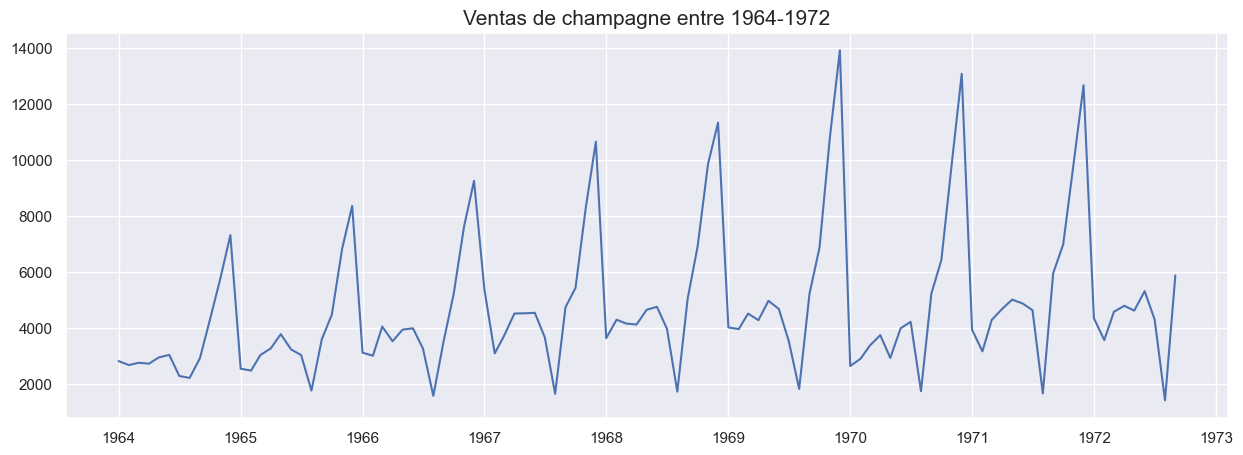

In [9]:
plt.figure(figsize=(15,5))
plt.title('Ventas de champagne entre 1964-1972', fontsize = 15)
plt.plot(df)
plt.show()

In [10]:
### Verificamos la estacionariedad

from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df['Sales'])

In [11]:
#H0: No es estacionaria
#H1: Es estacionaria

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print('El valor de p es menor a 0.05, lo que significa que podemos recharzar la hipótesis nula H0. Podemos concluir que los datos no tienen raíz unitaria y son estacionarios.')
    else:
        print('Evidencia débil contra la hipótesis nula, lo cual significa que la serie de tiempo tiene una raíz unitaria que indica que no es estacionaria.')

In [12]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276175
p-value : 0.3639157716602477
#Lags Used : 11
Number of Observations Used : 93
Evidencia débil contra la hipótesis nula, lo cual significa que la serie de tiempo tiene una raíz unitaria que indica que no es estacionaria.


### `Diferenciación`

La diferenciación ($\Delta^n$) ayuda a eliminar los cambios de los datos y hace que sean estacionarios.

In [13]:
df['Sales'],df['Sales'].shift(1)

(Month
 1964-01-01    2815.0
 1964-02-01    2672.0
 1964-03-01    2755.0
 1964-04-01    2721.0
 1964-05-01    2946.0
                ...  
 1972-05-01    4618.0
 1972-06-01    5312.0
 1972-07-01    4298.0
 1972-08-01    1413.0
 1972-09-01    5877.0
 Name: Sales, Length: 105, dtype: float64,
 Month
 1964-01-01       NaN
 1964-02-01    2815.0
 1964-03-01    2672.0
 1964-04-01    2755.0
 1964-05-01    2721.0
                ...  
 1972-05-01    4788.0
 1972-06-01    4618.0
 1972-07-01    5312.0
 1972-08-01    4298.0
 1972-09-01    1413.0
 Name: Sales, Length: 105, dtype: float64)

In [14]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [15]:
df['Sales First Difference'].head(12)

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
1964-06-01      90.0
1964-07-01    -754.0
1964-08-01     -70.0
1964-09-01     710.0
1964-10-01    1379.0
1964-11-01    1463.0
1964-12-01    1548.0
Name: Sales First Difference, dtype: float64

Tenemos datos mensuales, así que intentemos con un shift de 12.

In [16]:
df['Sales'].shift(12).head(20)

Month
1964-01-01       NaN
1964-02-01       NaN
1964-03-01       NaN
1964-04-01       NaN
1964-05-01       NaN
1964-06-01       NaN
1964-07-01       NaN
1964-08-01       NaN
1964-09-01       NaN
1964-10-01       NaN
1964-11-01       NaN
1964-12-01       NaN
1965-01-01    2815.0
1965-02-01    2672.0
1965-03-01    2755.0
1965-04-01    2721.0
1965-05-01    2946.0
1965-06-01    3036.0
1965-07-01    2282.0
1965-08-01    2212.0
Name: Sales, dtype: float64

In [17]:
df['Seasonal First Difference']= df['Sales'] - df['Sales'].shift(12)

In [18]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


Verificamos si nuestros datos ahora son estacionarios.

In [19]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
El valor de p es menor a 0.05, lo que significa que podemos recharzar la hipótesis nula H0. Podemos concluir que los datos no tienen raíz unitaria y son estacionarios.


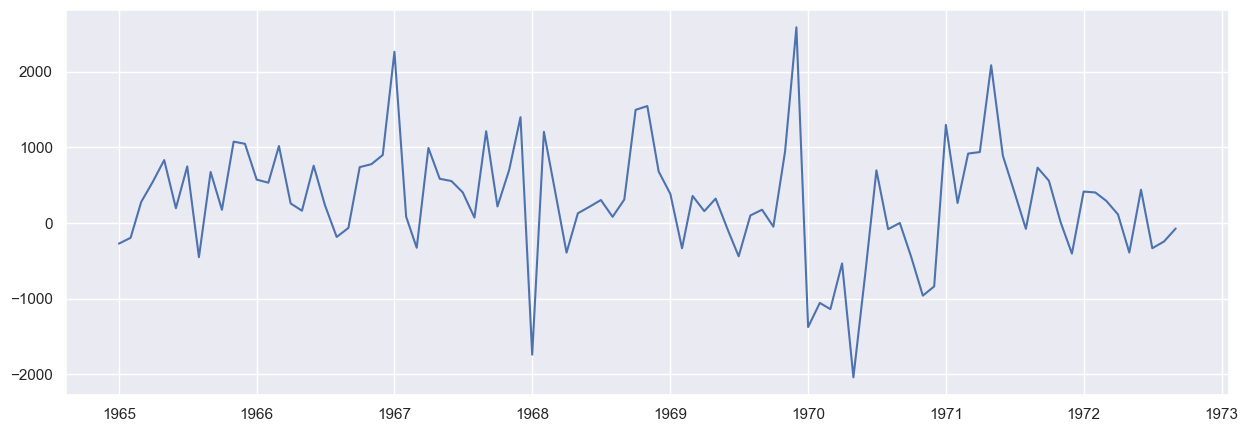

In [20]:
plt.figure(figsize=(15,5))

plt.plot(df['Seasonal First Difference'])
plt.show()

### `Correlograma`

La correlación es una cuantificación de la relación entre dos variables. 



Hasta este momento habíamos visto el concepto de correlación, el cual nos servía para cuantificar la relación entre dos variables. Ahora introduciremos el concepto de autocorrelación. 
La autocorrelación es la correlación de una serie consigo misma. Pero toda variable correlacionada consigo misma da 1, por lo que estaría faltando algo. Lo que falta son los *lags* (ventana temporal).

La autocorrelación se calcula con la serie de tiempo original y la misma serie desfasada o corrida en el tiempo. 

En la librería `statsmodel` esto lo logramos con la función `acf`.

Veremos la función de autocorrelación parcial y la función de autocorrelación . Mientras la primera solo tiene en cuenta el impacto de las variables directas, la segunda tiene en cuenta el impacto de las variables directas e indirectas.

In [21]:
#import sys
#!{sys.executable} -m pip uninstall statsmodels
#!{sys.executable} -m pip install statsmodels
import statsmodels as sm

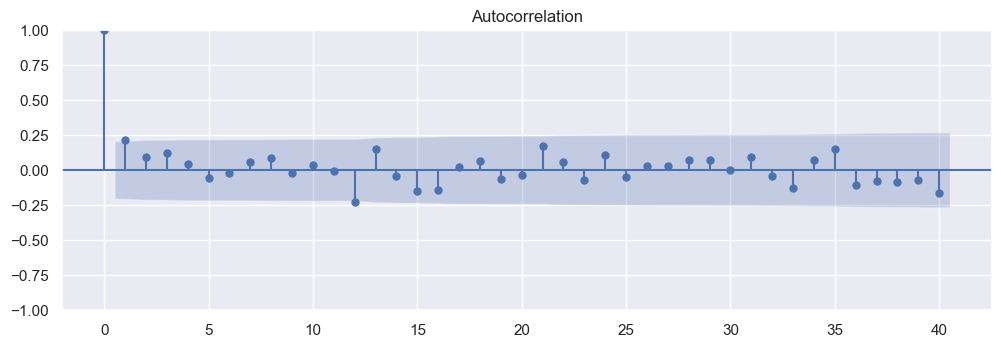

In [22]:
from statsmodels.graphics import tsaplots
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)

c:\Users\Pablo\.virtualenvs\practice_3-XeMdu4oE\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


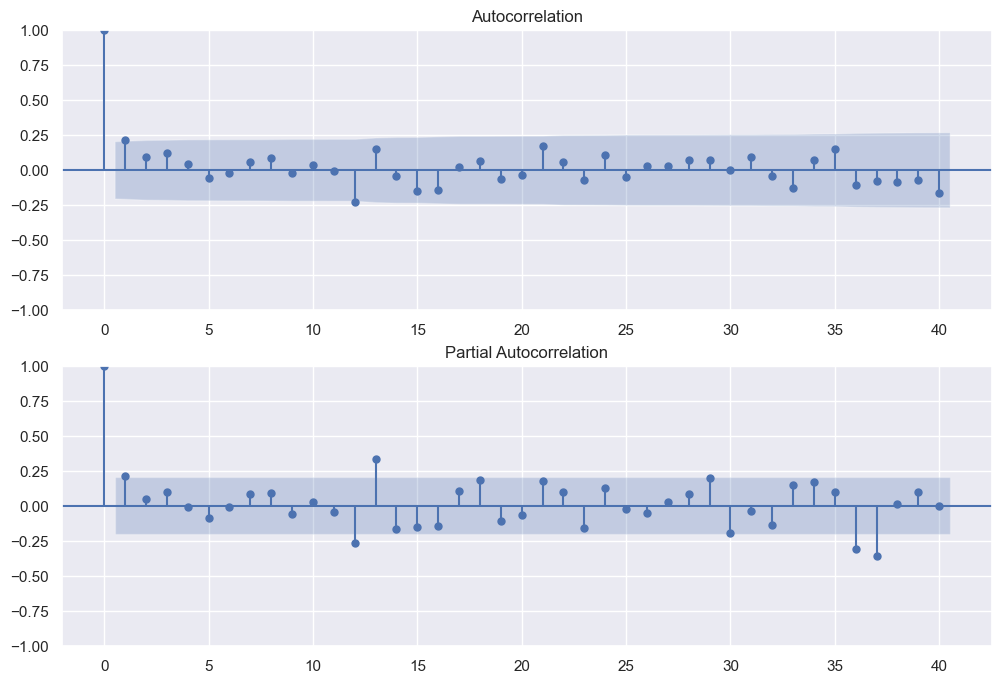

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = tsaplots.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

*Cada pico (retraso) que está por encima del área punteada se considera estadísticamente significativo.*

$\Delta y_t = \psi_1y_{t-1} + \delta_1e_{t-1} + e_t$

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
# Para datos no estacionales

# En parámetro order debemos especificar p, d y q

model = ARIMA(df['Sales'],order=(1,1,1)) # \Delta y_t = \psi_1y_{t-1} + \delta_1e_{t-1} + e_t

model_fit=model.fit()

c:\Users\Pablo\.virtualenvs\practice_3-XeMdu4oE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Pablo\.virtualenvs\practice_3-XeMdu4oE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Pablo\.virtualenvs\practice_3-XeMdu4oE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 02 Sep 2022   AIC                           1911.627
Time:                        15:06:46   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

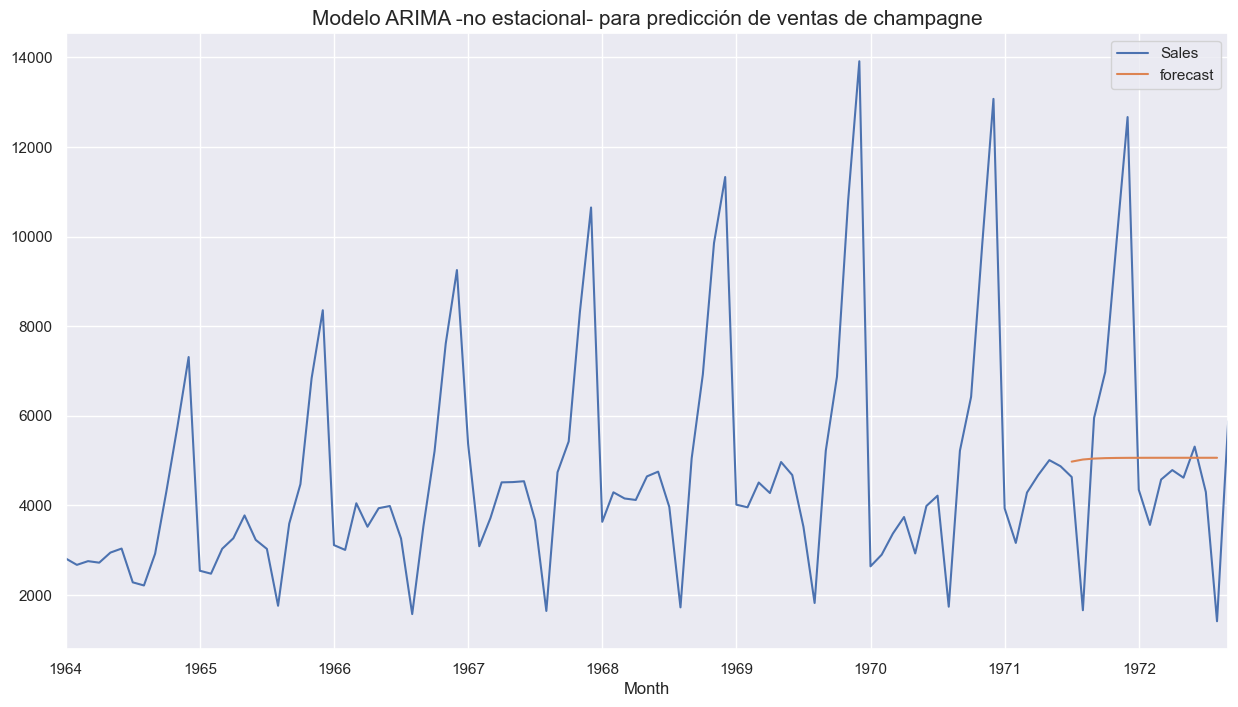

In [27]:
df['forecast']=model_fit.predict(start = 90, end = 103, dynamic = True)
df[['Sales','forecast']].plot(figsize=(15,8))
plt.title('Modelo ARIMA -no estacional- para predicción de ventas de champagne', fontsize = 15)
plt.show()

No estamos obteniendo buenos resultados usando ARIMA porque nuestros datos tienen un comportamiento estacional, así que intentemos usar ARIMA estacional.


In [30]:
import statsmodels as sm

In [34]:
# En el parámetro seasonal_orden debemos indicar = p estacional, d estacional, q estacional y periodicidad estacional

model=sm.tsa.statespace.sarimax.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\Pablo\.virtualenvs\practice_3-XeMdu4oE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Pablo\.virtualenvs\practice_3-XeMdu4oE\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Fri, 02 Sep 2022   AIC                           1486.804
Time:                                    15:16:25   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

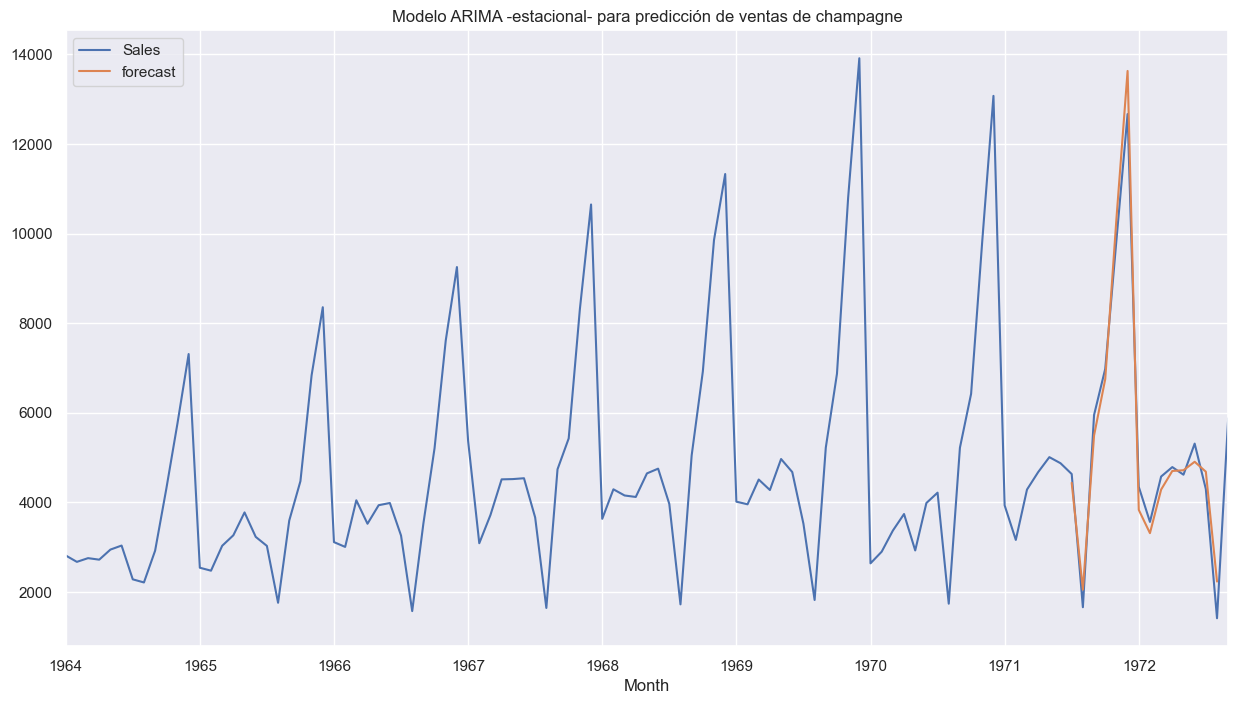

In [36]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(15,8))
plt.title('Modelo ARIMA -estacional- para predicción de ventas de champagne')
plt.show()

*Observamos cómo mejoro SARIMA respecto de ARIMA*.

Realizaremos una predicción de ventas para los próximos 3 años.

In [37]:
from pandas.tseries.offsets import DateOffset

future_dates = [df.index[-1]+ DateOffset(months=x)for x in range(0,36)] # 3 años = 36 meses

In [38]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [39]:
future_df = pd.concat([df,future_datest_df]) # Concatenamos los dos dataframes

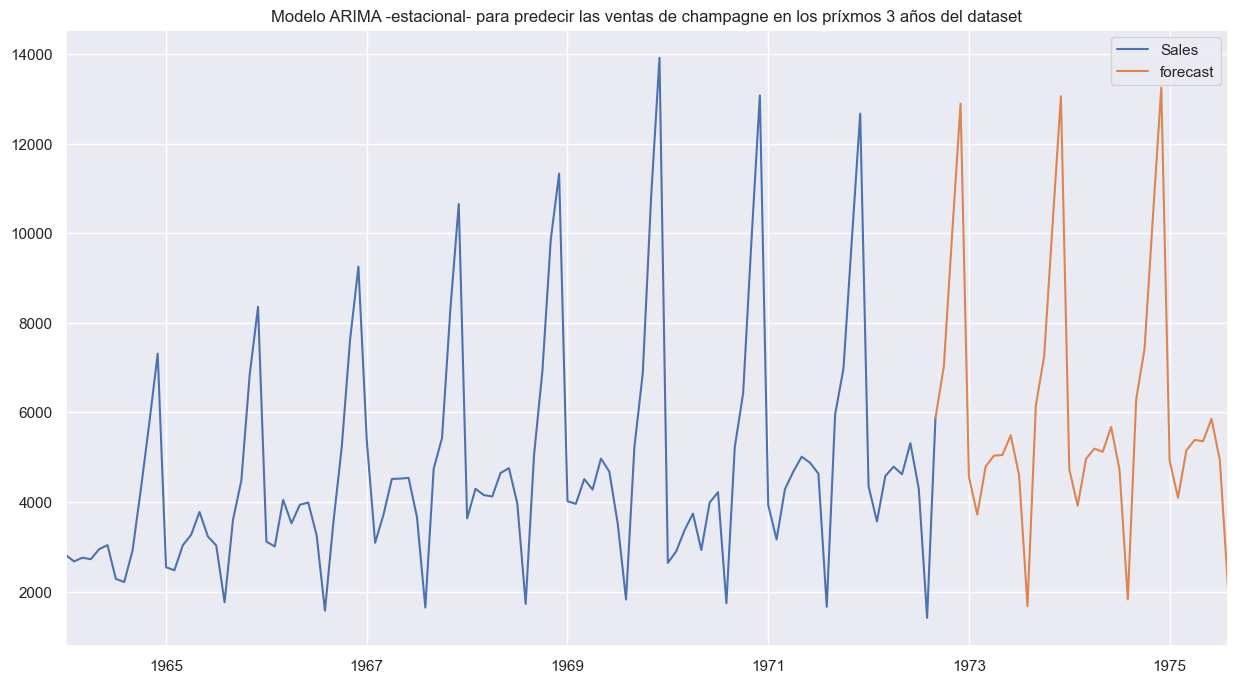

In [40]:
future_df['forecast'] = results.predict(start = 104, end = 156, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(15, 8)) 
plt.title('Modelo ARIMA -estacional- para predecir las ventas de champagne en los príxmos 3 años del dataset')
plt.show()